# Travel Insurance Data Analysis

####  Dataset Info:
           Sample Dataset containing Travel Insurance Data of several Agencies and Destinations. In this project i have done
        the Exploratory Data Analysis(EDA) on Travel Insurance Data by using python(pandas,Seaborn and matplotlib).

In [1]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the data file and look at some records of the data

In [2]:
df=pd.read_csv('travel insurance.csv')
df

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


#### Check the various attributes of data like shape(rows and columns),columns,datatypes

In [3]:
df.shape

(63326, 11)

In [4]:
df.columns.values

array(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales',
       'Commision (in value)', 'Gender', 'Age'], dtype=object)

In [6]:
# Checking the data types of all the columns 

df.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                    object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
dtype: object

we can see above all the data sets having the correct data types format so no need to change we can move into our further analysis.

# Data Cleaning

* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.



* As there is not any specific rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. but again there is a catch here, for example, Is_Car & Car_Type, people having no cars, will obviously have Car_Type as NaN(null), but that does not make this column useless, so decisions has to be taken Wisely.

In [7]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

#### As we can see there are 45107 missing values in Gender column.

# Missing Value Treatement

#### Since the percentage of these missing records compared to the total dataset is very high , so we need to drop those and it will also not create any sort of impact upon my analysis.

In [8]:
# Removing missing values

df.dropna(subset=['Gender'],how='all',inplace=True)
df.shape

(18219, 11)

In [9]:
df.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
dtype: int64

In [10]:
# Checking about duplicated values

df.duplicated().sum()

1260

In [11]:
# Removing the duplicated values

df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(16959, 11)

## Changing the name of the Columns

In [14]:
df.rename({'Agency Type':'Agency_Type','Distribution Channel':'Distribution_Channel','Product Name':'Product_Name','Net Sales':'Net_Sales','Commision(in value)':'Commision_(in value)'},axis=1,inplace=True)

#### Checking the Descriptive Statistics of numeric variables

In [15]:
df.describe()

,Duration,Net_Sales,Commision (in value),Age
count,16959.000000,16959.000000,16959.000000,16959.000000
mean,69.589127,57.978307,18.721790,43.716552
std,112.484197,74.390126,25.450331,18.905368
min,-2.000000,-389.000000,0.000000,0.000000
25%,10.000000,22.000000,6.750000,31.000000
50%,22.000000,30.000000,9.750000,40.000000
75%,59.000000,56.500000,17.230000,51.000000
max,740.000000,810.000000,283.500000,118.000000


#### Look at the top 5 records of data

In [16]:
df.head()

,Agency,Agency_Type,Distribution_Channel,Product_Name,Claim,Duration,Destination,Net_Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.0,42.35,F,44
11,JZI,Airlines,Online,Basic Plan,No,1,MALAYSIA,-18.0,6.30,M,47
12,KML,Travel Agency,Online,Premier Plan,No,53,NORWAY,-130.0,49.40,F,48


In [17]:
# Concise Summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16959 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                16959 non-null  object 
 1   Agency_Type           16959 non-null  object 
 2   Distribution_Channel  16959 non-null  object 
 3   Product_Name          16959 non-null  object 
 4   Claim                 16959 non-null  object 
 5   Duration              16959 non-null  int64  
 6   Destination           16959 non-null  object 
 7   Net_Sales             16959 non-null  float64
 8   Commision (in value)  16959 non-null  float64
 9   Gender                16959 non-null  object 
 10  Age                   16959 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 1.6+ MB


# Data Exploration

### Bivariate Analysis

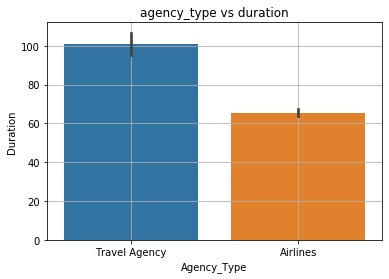

In [22]:
sns.barplot(x='Agency_Type',y='Duration',data=df)
plt.grid()
plt.title('agency_type vs duration')
plt.show()

* looking at the above bar graph we are not able to get any insights because we are not sure what is the value is showing us the average duration of the Agency_Types or some thing else.

  so lets try to figure it out below.

In [36]:
# counting total number of travel agency values

df.loc[df.Agency_Type=='Travel Agency',['Agency_Type']].count()

Agency_Type    2013
dtype: int64

In [37]:
## counting total number of airlines agency values

df.loc[df.Agency_Type=='Airlines',['Agency_Type']].count()

Agency_Type    14946
dtype: int64

In [38]:
# Checking total duration for travel agency

df.loc[df.Agency_Type=='Travel Agency',['Duration']].sum()

Duration    202885
dtype: int64

In [39]:
## Checking total duration for airlines agency

df.loc[df.Agency_Type=='Airlines',['Duration']].sum()

Duration    977277
dtype: int64

In [41]:
# Average duration for Travel Agency

df.loc[df.Agency_Type=='Travel Agency',['Duration']].mean()

Duration    100.787382
dtype: float64

In [42]:
## Average duration for Airlines Agency

df.loc[df.Agency_Type=='Airlines',['Duration']].mean()

Duration    65.387194
dtype: float64

* Now we are sure that the above bar garph shows us the average duration for both the agencies.

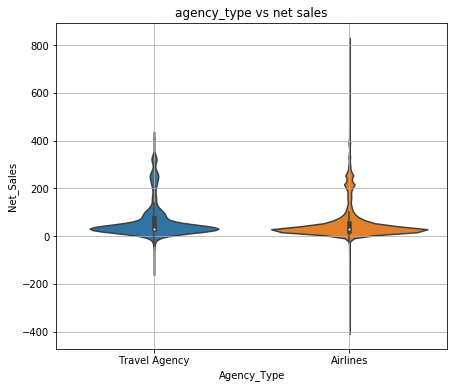

In [43]:
plt.figure(figsize=(7,6))
sns.violinplot(x='Agency_Type',y='Net_Sales',data=df)
plt.grid()
plt.title('agency_type vs net sales')
plt.show()

# Multivariate analysis

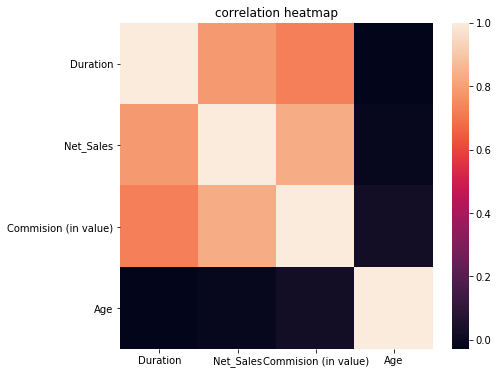

In [44]:
plt.figure(figsize=(7,6))
sns.heatmap(df.corr())
plt.title('correlation heatmap')
plt.show()

## Bivariate Analysis

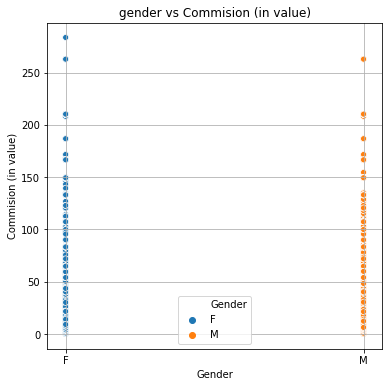

In [46]:
plt.figure(figsize=(6,6))

sns.scatterplot(x='Gender',y='Commision (in value)',data=df,hue='Gender',marker='o')
plt.grid()
plt.title('gender vs Commision (in value)')
plt.show()


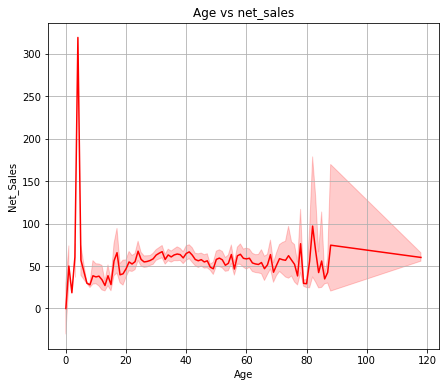

In [47]:
plt.figure(figsize=(7,6))

sns.lineplot(x='Age',y='Net_Sales',data=df,color='r')
plt.grid()
plt.title('Age vs net_sales')
plt.show()

In [48]:
# Checking up the unique values

df.Destination.unique()

array(['MALAYSIA', 'UNITED STATES', 'NORWAY', 'SINGAPORE', 'INDIA',
       'BRUNEI DARUSSALAM', 'AUSTRALIA', 'INDONESIA', 'THAILAND', 'CHINA',
       'PHILIPPINES', 'HONG KONG', 'VIET NAM', 'CAMBODIA', 'AUSTRIA',
       'MYANMAR', 'JAPAN', 'TAIWAN, PROVINCE OF CHINA', 'SRI LANKA',
       'UNITED KINGDOM', 'FRANCE', 'GERMANY', 'NETHERLANDS', 'MACAO',
       'KOREA, REPUBLIC OF', 'UNITED ARAB EMIRATES', 'DENMARK',
       "LAO PEOPLE'S DEMOCRATIC REPUBLIC", 'ITALY', 'OMAN', 'NEW ZEALAND',
       'FIJI', 'POLAND', 'NEPAL', 'SPAIN', 'CANADA', 'BRAZIL', 'PORTUGAL',
       'IRELAND', 'NEW CALEDONIA', 'FINLAND', 'SAUDI ARABIA', 'JORDAN',
       'SWEDEN', 'GUINEA', 'TURKEY', 'BANGLADESH', 'MONGOLIA',
       'AZERBAIJAN', 'PAKISTAN', 'MOROCCO', 'SWITZERLAND', 'LITHUANIA',
       'MALI', 'BELGIUM', 'CZECH REPUBLIC', 'HUNGARY', 'PAPUA NEW GUINEA',
       'BAHRAIN', 'KENYA', 'MAURITIUS', 'CYPRUS', 'ANGOLA', 'BELARUS',
       'ESTONIA', 'ARGENTINA', 'NAMIBIA', 'BULGARIA', 'PERU', 'QATAR',
       'IS

In [49]:
## Checking up some destinations name ,duration, net_sales , commision and age.

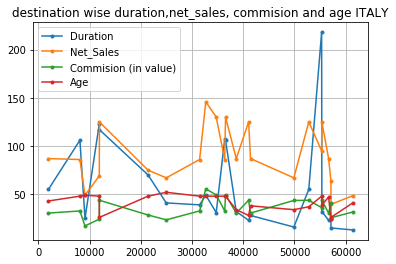

In [50]:
des= df[df.Destination=='ITALY'].plot(marker='.')

plt.title('destination wise duration,net_sales, commision and age ITALY')
plt.grid()
plt.show()

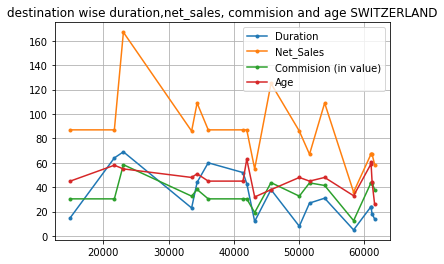

In [51]:
des= df[df.Destination=='SWITZERLAND'].plot(marker='.',style='-')
plt.title('destination wise duration,net_sales, commision and age SWITZERLAND')
plt.grid()
plt.show()

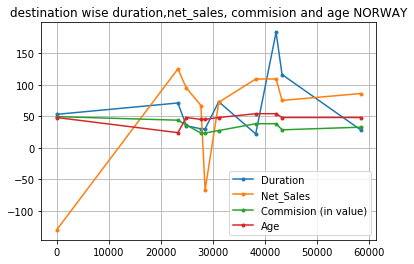

In [52]:
des= df[df.Destination=='NORWAY'].plot(marker='.')
plt.title('destination wise duration,net_sales, commision and age NORWAY')
plt.grid()
plt.show()

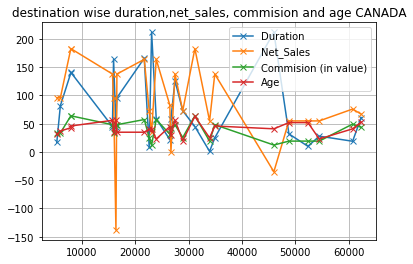

In [53]:
des= df[df.Destination=='CANADA'].plot(marker='x',style='-')
plt.title('destination wise duration,net_sales, commision and age CANADA')
plt.legend(loc='best')
plt.grid()
plt.show()

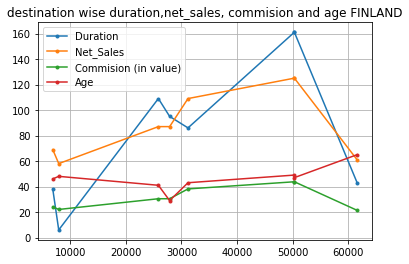

In [54]:
des= df[df.Destination=='FINLAND'].plot(marker='.',style='-')
plt.title('destination wise duration,net_sales, commision and age FINLAND')
plt.grid()
plt.show()

# Top 10 most selling products by Net sales

In [55]:
## grouping product name column by using group by method-

prods_sales=pd.DataFrame(df.groupby('Product_Name').sum()['Net_Sales'])
prods_sales

,Net_Sales
Product_Name,
24 Protect,5455.74
Annual Gold Plan,63146.60
Annual Silver Plan,279666.11
Annual Travel Protect Gold,24438.05
Annual Travel Protect Platinum,17607.10
Annual Travel Protect Silver,17251.30
Basic Plan,137253.00
Bronze Plan,129459.95
Child Comprehensive Plan,592.00


In [56]:
## sorting product sales column-

products_sales= prods_sales.sort_values('Net_Sales',ascending=False)
products_sales

,Net_Sales
Product_Name,
Annual Silver Plan,279666.11
Basic Plan,137253.00
Bronze Plan,129459.95
Silver Plan,110815.85
Value Plan,108759.00
Annual Gold Plan,63146.60
Gold Plan,27825.70
Annual Travel Protect Gold,24438.05
Annual Travel Protect Platinum,17607.10


# Top 10 most selling products below

In [57]:
products_sales[:10]

,Net_Sales
Product_Name,
Annual Silver Plan,279666.11
Basic Plan,137253.00
Bronze Plan,129459.95
Silver Plan,110815.85
Value Plan,108759.00
Annual Gold Plan,63146.60
Gold Plan,27825.70
Annual Travel Protect Gold,24438.05
Annual Travel Protect Platinum,17607.10


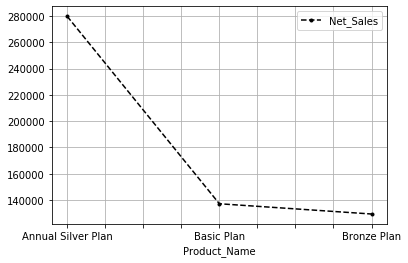

In [58]:
# Top 3 products by Net sales in the form of visual

products_sales[:3].plot(style='--',c='black',marker='.')
plt.grid()
plt.show()

# Bottom 10 Net sales by products

In [59]:
## grouping product name column by using group by method-

prod_sales=pd.DataFrame(df.groupby('Product_Name').sum()['Net_Sales'])
prod_sales

,Net_Sales
Product_Name,
24 Protect,5455.74
Annual Gold Plan,63146.60
Annual Silver Plan,279666.11
Annual Travel Protect Gold,24438.05
Annual Travel Protect Platinum,17607.10
Annual Travel Protect Silver,17251.30
Basic Plan,137253.00
Bronze Plan,129459.95
Child Comprehensive Plan,592.00


In [60]:
## sorting product sales column-

product_sales= prod_sales.sort_values('Net_Sales',ascending=True)
product_sales

,Net_Sales
Product_Name,
Travel Cruise Protect Family,0.00
Rental Vehicle Excess Insurance,227.70
Child Comprehensive Plan,592.00
Spouse or Parents Comprehensive Plan,1290.00
Single Trip Travel Protect Platinum,3230.65
24 Protect,5455.74
Single Trip Travel Protect Silver,5948.75
Individual Comprehensive Plan,6887.00
Single Trip Travel Protect Gold,7981.60


In [61]:
product_sales[:10]

,Net_Sales
Product_Name,
Travel Cruise Protect Family,0.00
Rental Vehicle Excess Insurance,227.70
Child Comprehensive Plan,592.00
Spouse or Parents Comprehensive Plan,1290.00
Single Trip Travel Protect Platinum,3230.65
24 Protect,5455.74
Single Trip Travel Protect Silver,5948.75
Individual Comprehensive Plan,6887.00
Single Trip Travel Protect Gold,7981.60


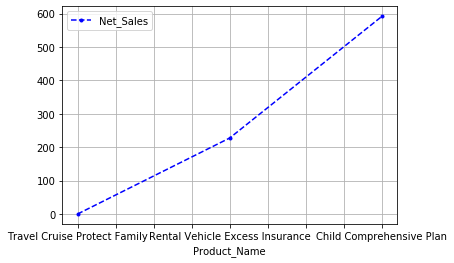

In [62]:
# Bottom 3 products by Net sales in the form of visual

product_sales[:3].plot(style='--',c='b',marker='.')
plt.grid()
plt.show()

# Top 10 Destinations by Net sales

In [63]:
## grouping Destination name column by using group by method-

Top_10_dest =pd.DataFrame(df.groupby('Destination').sum()['Net_Sales'])
Top_10_dest

,Net_Sales
Destination,
ANGOLA,0.00
ARGENTINA,114.00
AUSTRALIA,10818.90
AUSTRIA,710.50
AZERBAIJAN,49.00
...,...
UNITED ARAB EMIRATES,2052.89
UNITED KINGDOM,7629.50
UNITED STATES,61246.10


In [64]:
## sorting product sales column-

Top_10 = Top_10_dest.sort_values('Net_Sales',ascending=False)
Top_10

,Net_Sales
Destination,
SINGAPORE,618236.41
UNITED STATES,61246.10
CHINA,49423.65
THAILAND,36645.57
INDIA,31036.25
...,...
MALDIVES,48.50
"IRAN, ISLAMIC REPUBLIC OF",42.08
FIJI,35.00


# Top 10 Destinations by Net_Sales below

In [65]:
Top_10[:10]

,Net_Sales
Destination,
SINGAPORE,618236.41
UNITED STATES,61246.10
CHINA,49423.65
THAILAND,36645.57
INDIA,31036.25
MALAYSIA,23902.14
INDONESIA,21233.40
HONG KONG,19187.38
PHILIPPINES,15040.91


# Bottom 10 Destinations by Net sales

In [66]:
## grouping Destination name column by using group by method-

Bottom_10_dest =pd.DataFrame(df.groupby('Destination').sum()['Net_Sales'])
Bottom_10_dest

,Net_Sales
Destination,
ANGOLA,0.00
ARGENTINA,114.00
AUSTRALIA,10818.90
AUSTRIA,710.50
AZERBAIJAN,49.00
...,...
UNITED ARAB EMIRATES,2052.89
UNITED KINGDOM,7629.50
UNITED STATES,61246.10


In [67]:
## sorting product sales column-

Bottom_10 = Bottom_10_dest.sort_values('Net_Sales',ascending=True)
Bottom_10

,Net_Sales
Destination,
ANGOLA,0.00
MOROCCO,0.00
FIJI,35.00
"IRAN, ISLAMIC REPUBLIC OF",42.08
MALDIVES,48.50
...,...
INDIA,31036.25
THAILAND,36645.57
CHINA,49423.65


# Bottom 10 Destinations by Net_Sales below

In [68]:
Bottom_10[:10]

,Net_Sales
Destination,
ANGOLA,0.00
MOROCCO,0.00
FIJI,35.00
"IRAN, ISLAMIC REPUBLIC OF",42.08
MALDIVES,48.50
AZERBAIJAN,49.00
BELARUS,52.50
OMAN,55.00
PAPUA NEW GUINEA,58.00


# Findings :

1. The average Duration of Travel agency is having more than airlines which is around 101:65 ratio respectively.

2. airline agency having more net sales than travel agency which is around 810 and the travel agency is having net sales around 422.

3. In airline agency there is more negative net sales as compared to travel agency which is approxmate -389 and for for travel agency it is between -220 to -230.

4. Females having more/higher commision value than males which is around 283 and for males is around 240.

5. Between age group (0-10) the net sales are high than other age group which is probably 325.

6. The destination italy is having highest net sales is 148 and his lowest is around 40.

7. Switzerland having highest commision value that is 59 and its own lowest commision value is around 15.

8. All the net sales happened in the finland between (30-65) age group.

9. annual silver plan is the top selling product among the other products which is 279666.11.

10. Travel Cruise Protect Family is the lowest selling product among the other products which is 0.00.

11. SINGAPORE is having the highest amount of net_sales that is 618236.41 among all other destinations.

12. The lowest net_sales destination is ANGOLA which is 0.

